# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
print(cities_count)
# print(cities)

605


In [3]:

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# create setting and desired_keys
setting = {'units':'Imperial','appid':api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set lists for the dataframe
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []



In [5]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    try:
        city_data = ow.get_current(city,**setting)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing City # 1 | san agustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e7df2c4661bc5fbce42a570be4147f0&q=san+agustin
Processing City # 2 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e7df2c4661bc5fbce42a570be4147f0&q=vardo
Processing City # 3 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e7df2c4661bc5fbce42a570be4147f0&q=khatanga
Processing City # 4 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e7df2c4661bc5fbce42a570be4147f0&q=tuatapere
Processing City # 5 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e7df2c4661bc5fbce42a570be4147f0&q=chokurdakh
Processing City # 6 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e7df2c4661bc5fbce42a570be4147f0&q=hermanus
Processing City # 7 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?unit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()
weather_df.to_csv(output_data_file)

In [7]:
weather_df.count()


City               545
Cloudiness         545
Country            545
Date               545
Humidity           545
Lat                545
Lng                545
Max Temperature    545
Wind Speed         545
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude') 
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(weather_df[y])-20,max(weather_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

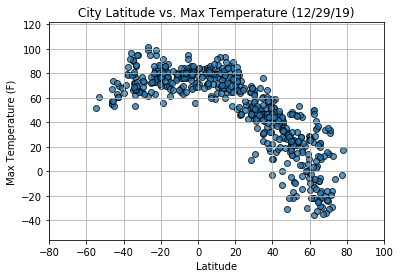

In [9]:
lat_temp = plot_lat(y='Max Temperature',y_label='Max Temperature (F)')
lat_temp

#### Latitude vs. Humidity Plot

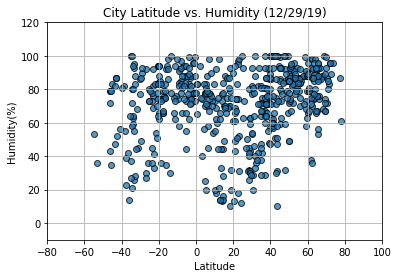

In [10]:

lat_humidity = plot_lat(y='Humidity',y_label='Humidity(%)')
lat_humidity


#### Latitude vs. Cloudiness Plot

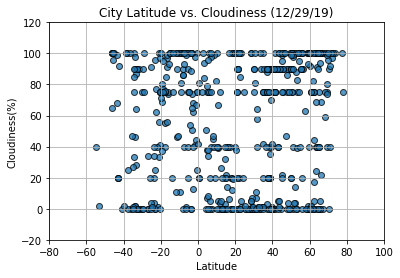

In [11]:
lat_cloud = plot_lat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

#### Latitude vs. Wind Speed Plot

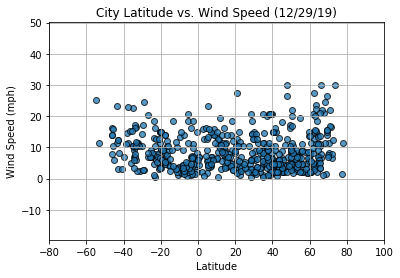

In [12]:
lat_wind = plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind